<a href="https://colab.research.google.com/github/swatibharati/LGMVIP-Data-Science/blob/main/Iris_Flower_Classification_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the dataset
iris_data=pd.read_csv('iris.csv')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
columns= ['SepalLength','SepalWidth','PetalLength','PetalWidth','class']
iris_data.columns = columns
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Exploratory Data Analysis
iris_data.shape

(150, 5)

In [ ]:
#Cloumn headings
iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'class'], dtype='object')

In [ ]:
#Datatypes in Dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Summary of the dataset
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Checking missing values
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
class          0
dtype: int64

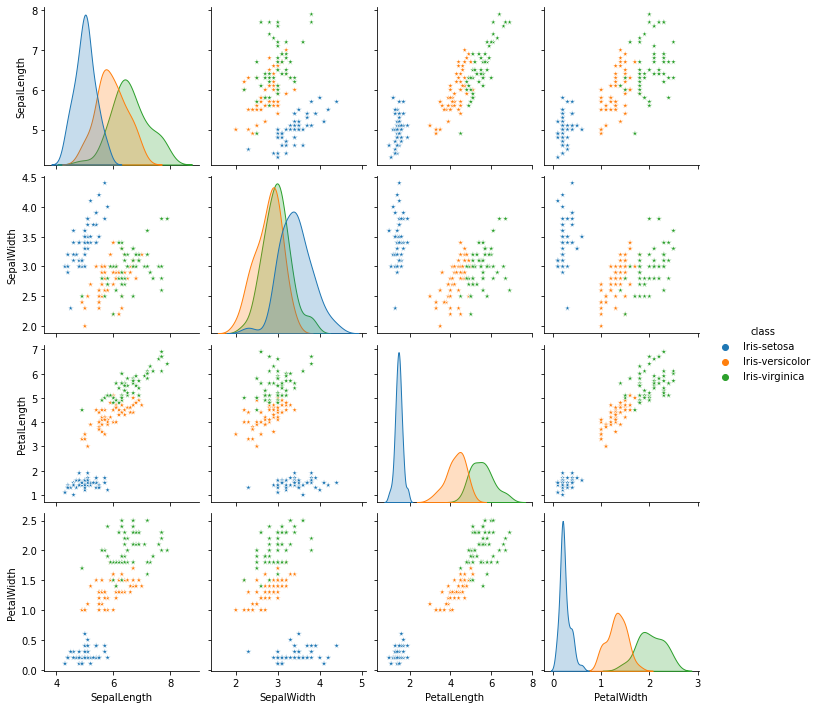

In [ ]:
#Data Visualization
#Plotting
sns.pairplot(iris_data,hue='class',markers='*')

In [ ]:
# Checking correlation
iris_data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


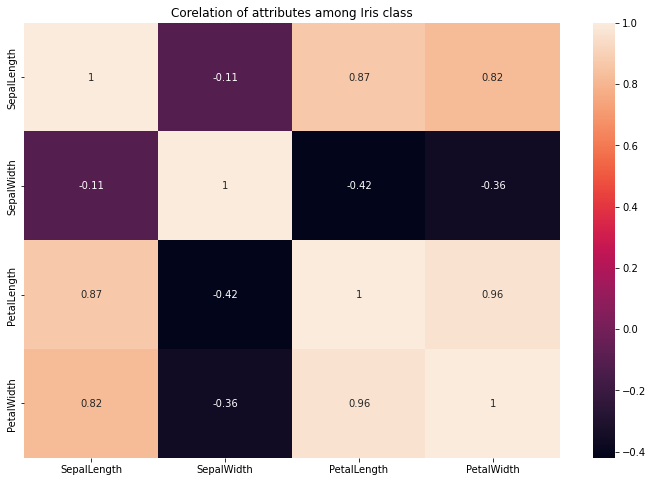

In [ ]:
# PLotting it into Heatmap
plt.subplots(figsize = (12, 8))
sns.heatmap(iris_data.corr(), annot = True).set_title("Corelation of attributes among Iris class")
plt.show()

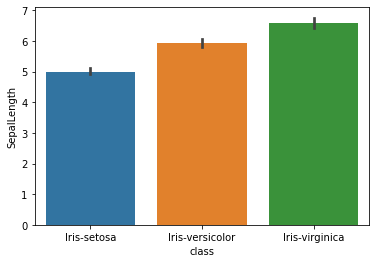

In [ ]:
#Data comparision using Barplot
sns.barplot(x='class', y='SepalLength',data=iris_data)

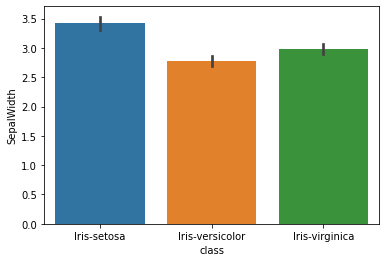

In [ ]:
sns.barplot(x='class', y='SepalWidth',data=iris_data)

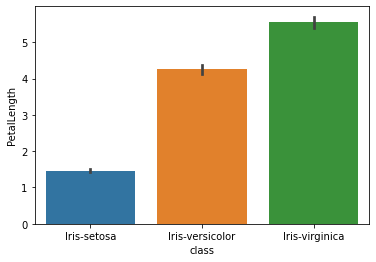

In [ ]:
sns.barplot(x='class', y='PetalLength',data=iris_data)

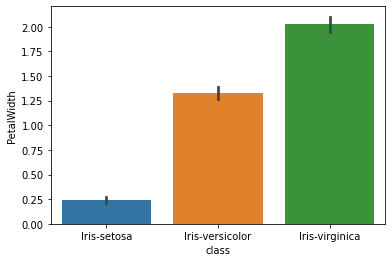

In [ ]:
sns.barplot(x='class', y='PetalWidth',data=iris_data)

In [ ]:
#Splitting the Dataset
x = iris_data.drop(columns="class")
y = iris_data["class"]

In [ ]:
#Training + Testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)

In [ ]:
x_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [ ]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: class, dtype: object

In [ ]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: class, dtype: object

In [ ]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

x_train:  90
x_test:  60
y_train:  90
y_test:  60


In [ ]:
#Building the model
#Using Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predict = model.predict(x_test)
print("Pridicted values on Test Data", predict)

Pridicted values on Test Data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [ ]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [ ]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

Training Accuracy :  0.9777777777777777
Test Accuracy :  0.9666666666666667
